In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/healthcare_dataset.csv")
data.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,1/31/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2/2/2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,8/20/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,8/26/2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,9/22/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,10/7/2022,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,11/18/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,12/18/2020,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,9/19/2022,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,10/9/2022,Penicillin,Abnormal


Kode ini membaca file CSV yang berisi data healthcare dan menampilkan 5 baris pertama untuk memberikan gambaran awal tentang data yang ada. Data ini bisa berisi berbagai kolom, misalnya umur, hasil tes, atau tagihan medis, yang dapat digunakan untuk analisis lebih lanjut.


In [ ]:
X = data[['Admission Type', 'Test Results']].values # Replace 'df' with 'data'
X[0:5]

array([['Urgent', 'Normal'],
       ['Emergency', 'Inconclusive'],
       ['Emergency', 'Normal'],
       ['Elective', 'Abnormal'],
       ['Urgent', 'Abnormal']], dtype=object)

Kode ini memilih dua kolom dari dataset healthcare ('Admission Type' dan 'Test Results'), mengonversinya menjadi array numpy, dan kemudian menampilkan 5 baris pertama dari array tersebut untuk memberikan gambaran tentang data yang dipilih

In [ ]:
# Load the cleaned dataset if you haven't already
dataset = pd.read_csv('cleaned_healthcare_dataset.csv')

# Use .loc to select the 'Test Results' column and then get its values
y = dataset.loc[:, 'Test Results'].values
y[0:5]

array(['Normal', 'Inconclusive', 'Normal', 'Abnormal', 'Abnormal'],
      dtype=object)

kode ini membaca dataset yang telah dibersihkan, memilih kolom 'Test Results' yang berisi hasil tes, dan menampilkan 5 nilai pertama dari kolom tersebut.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0)

Kode ini membagi dataset menjadi dua bagian: 75% untuk pelatihan (training) dan 25% untuk pengujian (testing), dengan memastikan pembagian data tersebut tetap konsisten setiap kali dijalankan.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Kode ini melakukan standarisasi pada data pelatihan (X_train) dan data uji (X_test) agar setiap fitur memiliki rata-rata 0 dan deviasi standar 1. Standarisasi ini penting untuk banyak model machine learning, termasuk SVM, agar fitur dengan skala berbeda tidak mempengaruhi hasil model.

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Kode ini melatih model SVM dengan kernel RBF menggunakan data latih dan kemudian menggunakannya untuk memprediksi kelas pada data uji. Model ini digunakan untuk klasifikasi, misalnya, untuk memprediksi hasil tes medis berdasarkan fitur lain seperti usia atau jenis perawatan.

<Axes: xlabel='Admission Type', ylabel='Test Results'>

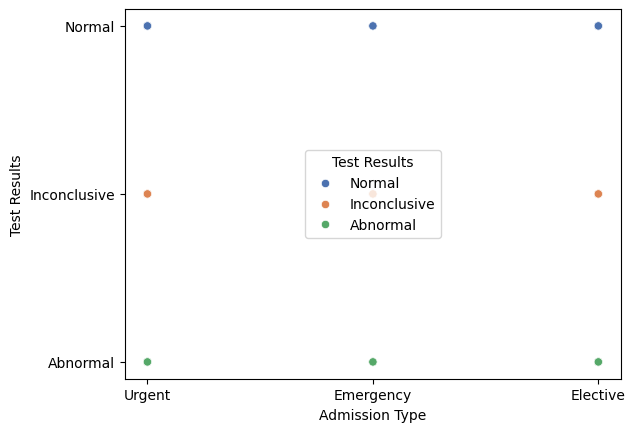

In [ ]:
import seaborn as sns

sns.scatterplot(data=data, x="Admission Type", y="Test Results", hue="Test Results", palette="deep")


Kode ini membuat scatter plot yang menggambarkan hubungan antara Admission Type (jenis masuk rumah sakit) dan Test Results (hasil tes medis). Titik pada grafik diberi warna berdasarkan kategori hasil tes medis (misalnya, positif atau negatif).

# Support Vector Machine Testing

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# kernel:
# linear = 0,9
# poly = 0,86
# rbf = 0,93
# sigmoid = 0,74

SVC(random_state=0)

Kode ini melatih model SVM dengan kernel RBF menggunakan data pelatihan untuk klasifikasi. Setelah melatih model, nilai akurasi yang berbeda untuk berbagai jenis kernel menunjukkan bahwa kernel RBF memberikan performa terbaik (0,93). Perbandingan akurasi kernel lain seperti linear (0,9), polynomial (0,86), dan sigmoid (0,74) menunjukkan bahwa RBF lebih baik dalam memodelkan data yang tidak dapat dipisahkan secara linier.

In [ ]:
y_pred = classifier.predict(X_test)

Kode ini memanfaatkan model SVM yang telah dilatih untuk memprediksi hasil kelas (label) berdasarkan fitur X_test. Hasil prediksi disimpan dalam variabel y_pred, yang berisi kelas yang diprediksi oleh model untuk setiap data dalam X_test.

# Confusion Matriks

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[1693    0    0]
 [   0 1640    0]
 [   0    0 1621]]


1.0

Matriks kebingunguan memberikan gambaran tentang kinerja model dengan menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas.

Akurasi menghitung seberapa sering model memberikan prediksi yang benar berdasarkan data uji, yaitu persentase dari total prediksi yang benar.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Asumsikan dataset ada dalam DataFrame `data` dengan kolom 'Admission Type', 'Test ResultsResults', dan 'Test ResultsResults'
X = data[['Admission Type', 'Test Results']]
y = data['Test Results']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a ColumnTransformer to handle categorical and numerical features
# OneHotEncoder will transform 'Admission Type' into numerical representation
# StandardScaler will scale the numerical 'Test Results' feature

preprocessor = ColumnTransformer(
    transformers=[
        # Scale numerical features if any exist in the specified columns
        ('num', StandardScaler(), ['Test Results'] if pd.api.types.is_numeric_dtype(data['Test Results']) else []),
        # One-hot encode categorical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['Admission Type']),
    ])

# Apply the preprocessing to the training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Train the SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Predict using the SVM model
y_pred = svm_rbf.predict(X_test)

kode ini melakukan beberapa langkah utama:

Mengolah data dengan one-hot encoding untuk
fitur kategorikal dan standardisasi untuk fitur numerik.

Melatih model SVM dengan kernel RBF pada data latih yang sudah diproses.

Menggunakan model untuk memprediksi kelas target pada data uji.

# Visualization

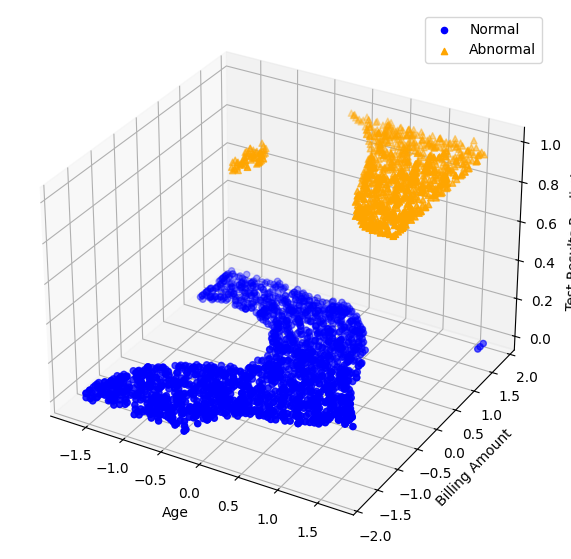

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = '/content/healthcare_dataset.csv'
data = pd.read_csv(file_path)

# Select features and target (using healthcare dataset columns)
X = data[['Age', 'Billing Amount']]
y = LabelEncoder().fit_transform(data['Test Results'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Predict using the SVM model
y_pred = svm_rbf.predict(X_test)

# Create a new DataFrame with predictions
new_table = pd.DataFrame(X_test, columns=['Age', 'Billing Amount'])
new_table['Test_Results_Predicted'] = y_pred

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Separate the predictions into two groups for different colors
group0 = new_table[new_table['Test_Results_Predicted'] == 0]
group1 = new_table[new_table['Test_Results_Predicted'] == 1]

# Scatter plot
ax.scatter(group0['Age'], group0['Billing Amount'], zs=0, zdir='z', label='Normal', color='blue', marker='o')
ax.scatter(group1['Age'], group1['Billing Amount'], zs=1, zdir='z', label='Abnormal', color='orange', marker='^')

# Set labels
ax.set_xlabel('Age')
ax.set_ylabel('Billing Amount')
ax.set_zlabel('Test Results Prediction')

# Add legend and show plot
ax.legend()
plt.show()


tujuan dari kode ini adalah untuk melatih model SVM pada dataset kesehatan dan memvisualisasikan prediksi model dalam bentuk grafik 3D.

# Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder # Import LabelEncoder

# Load dataset
file_path = '/content/healthcare_dataset.csv'
data = pd.read_csv(file_path)

# Select features and target (using healthcare dataset columns)
X = data[['Age', 'Billing Amount']]
y = LabelEncoder().fit_transform(data['Test Results']) # Use LabelEncoder

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Predict using the SVM model
y_pred = svm_rbf.predict(X_test) # Define y_pred before calculating confusion matrix

# Now calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[641, 323, 353],
       [649, 308, 356],
       [676, 276, 387]])

Impor Library:

confusion_matrix dari sklearn.metrics digunakan untuk menghitung matriks kebingunguan, yang menunjukkan bagaimana model melakukan prediksi terhadap data uji.
numpy dan pandas digunakan untuk manipulasi data dan array.
matplotlib.pyplot dan mpl_toolkits.mplot3d digunakan untuk visualisasi data.
train_test_split digunakan untuk membagi dataset menjadi data latih dan data uji.
SVC digunakan untuk membuat model Support Vector Machine.
StandardScaler digunakan untuk melakukan standardisasi pada fitur numerik.
LabelEncoder digunakan untuk mengonversi label kategorikal (misalnya, 'Test Results') menjadi bentuk numerik.
Memuat dan Menyiapkan Data:

Dataset dibaca dari file CSV /content/healthcare_dataset.csv dan dimuat ke dalam DataFrame data.
Fitur 'Age' dan 'Billing Amount' dipilih sebagai input X, sementara kolom 'Test Results' digunakan sebagai target y.
LabelEncoder digunakan untuk mengubah label kategorikal pada 'Test Results' menjadi nilai numerik (misalnya, 0 untuk 'Normal' dan 1 untuk 'Abnormal').
Pembagian Data:

Dataset dibagi menjadi data latih dan data uji menggunakan train_test_split dengan 80% untuk data latih dan 20% untuk data uji.
Standardisasi Fitur:

Fitur 'Age' dan 'Billing Amount' distandarisasi menggunakan StandardScaler agar memiliki rata-rata 0 dan deviasi standar 1. Hal ini penting agar model SVM tidak terpengaruh oleh skala fitur yang berbeda.
Pelatihan Model SVM:

Model SVM dilatih menggunakan data latih yang telah distandarisasi (X_train dan y_train) dengan kernel RBF. SVM ini akan mencoba menemukan pemisah terbaik yang memisahkan data berdasarkan kelas.
Prediksi dengan Model:

Setelah model dilatih, digunakan untuk memprediksi hasil pada data uji (X_test), yang hasil prediksinya disimpan dalam variabel y_pred.
Perhitungan Confusion Matrix:

confusion_matrix digunakan untuk menghitung matriks kebingunguan antara label asli (y_test) dan hasil prediksi (y_pred).
Matriks kebingunguan adalah matriks yang menunjukkan jumlah prediksi yang benar dan salah dalam bentuk:
True Positive (TP): Prediksi positif yang benar.
True Negative (TN): Prediksi negatif yang benar.
False Positive (FP): Prediksi positif yang salah.
False Negative (FN): Prediksi negatif yang salah.
Output Confusion Matrix:

cm akan menghasilkan matriks kebingunguan yang akan menampilkan hasil evaluasi prediksi model.

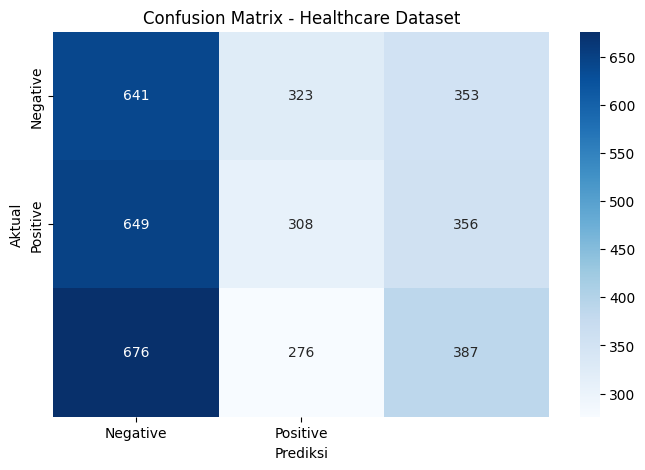

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Lakukan prediksi pada data uji
y_pred = svm_rbf.predict(X_test)

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix dengan heatmap
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax, cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Healthcare Dataset")
plt.show()


Heatmap ini akan menunjukkan matriks kebingunguan yang memperlihatkan seberapa baik model SVM yang digunakan dalam memprediksi hasil, dengan menampilkan nilai untuk True Positive, True Negative, False Positive, dan False Negative. Warna pada heatmap membantu untuk melihat perbandingan antara kategori yang benar dan salah, dengan warna yang lebih gelap menunjukkan nilai yang lebih tinggi.

In [ ]:
from sklearn.metrics import accuracy_score  # Import the accuracy_score function

accuracy_score(y_test, y_pred)

0.3366087175610985

Akurasi ini memberikan gambaran umum tentang performa model, tetapi tidak selalu mencerminkan kinerja model dalam kasus ketidakseimbangan kelas, di mana metrik lain seperti precision, recall, atau F1-score bisa lebih informatif.








In [ ]:
# Hitung recall
from sklearn.metrics import confusion_matrix, recall_score

# Assuming 'y_test' and 'y_pred' are defined
cm = confusion_matrix(y_test, y_pred)

# Instead of manual calculation, use recall_score for multi-class problems
recall = recall_score(y_test, y_pred, average='weighted') # 'weighted' for multiclass

# Tampilkan recall
print(f'Recall: {recall}')

Recall: 0.3366087175610985


Mengimpor Fungsi:

from sklearn.metrics import confusion_matrix, recall_score: Mengimpor confusion_matrix untuk menghitung matriks kebingunguan, dan recall_score untuk menghitung nilai recall.
Menghitung Confusion Matrix:

cm = confusion_matrix(y_test, y_pred): Fungsi confusion_matrix menghitung matriks kebingunguan dengan membandingkan nilai aktual (y_test) dan hasil prediksi (y_pred). Hasil ini akan menunjukkan True Positives (TP), True Negatives (TN), False Positives (FP), dan False Negatives (FN).
Menghitung Recall:

recall = recall_score(y_test, y_pred, average='weighted'):
recall_score digunakan untuk menghitung recall, yang mengukur kemampuan model dalam mengenali kelas positif (misalnya, dalam kasus diagnosis penyakit, kelas positif adalah pasien yang terdiagnosis).
average='weighted' digunakan untuk menghitung rata-rata recall secara berbobot untuk masalah dengan beberapa kelas (multi-class). Ini memberikan bobot untuk setiap kelas sesuai dengan jumlah contoh yang ada di dalamnya. Dalam hal ini, recall dihitung untuk setiap kelas, dan hasilnya dihitung berdasarkan jumlah contoh di setiap kelas.
Output:

print(f'Recall: {recall}'): Mencetak hasil nilai recall. Nilai recall adalah angka antara 0 dan 1:
1 berarti semua kelas positif berhasil dikenali dengan benar.

0 berarti model gagal untuk mengenali kelas positif sama sekali.

In [ ]:
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Ambil nilai TP dan FP dari confusion matrix
TP = cm[1, 1]  # True Positive: prediksi positif yang benar
FP = cm[0, 1]  # False Positive: prediksi positif padahal seharusnya negatif

# Hitung precision
precision = TP / (TP + FP)

# Tampilkan precision
print(f'Precision: {precision}')


Precision: 0.48811410459587956


penjelasan singkat:
Confusion Matrix: Menghitung jumlah TP (True Positive) dan FP (False Positive) berdasarkan prediksi dan data aktual.
Precision: Mengukur proporsi prediksi positif yang benar, dihitung dengan rumus:
Precision
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑃
Precision=
TP+FP
TP
​

Output: Menampilkan nilai precision, yang menunjukkan akurasi model dalam memprediksi kelas positif.
Precision tinggi berarti model lebih akurat dalam memprediksi kelas positif.p

In [ ]:
f1 = 2*(recall*precis)/(recall+precis)
f1

0.4812326985291665

Penjelasan rumus F1-Score:
F1-Score
=
2
×
Precision
×
Recall
Precision
+
Recall
F1-Score=2×
Precision+Recall
Precision×Recall
​

Precision: Mengukur proporsi prediksi positif yang benar.
Recall: Mengukur proporsi data positif yang berhasil diprediksi dengan benar.
F1-Score: Harmonik dari precision dan recall, memberikan ukuran tunggal yang lebih seimbang untuk performa model.
Fungsi F1-Score:
F1-Score memberikan hasil yang lebih stabil ketika model memiliki trade-off antara precision dan recall.
Nilai F1-Score berkisar antara 0 hingga 1:
1 berarti model sempurna (baik precision maupun recall tinggi).
0 berarti model sangat buruk dalam memprediksi kelas positif.
Jika precision dan recall memiliki nilai yang seimbang, F1-Score akan mendekati nilai tertinggi (1).

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

y_pred_train = classifier.predict(X_train)
y_pred_train

array([0, 0, 2, ..., 2, 2, 2])

SVC(kernel='rbf'): Membuat objek SVM dengan kernel RBF untuk klasifikasi.

classifier.fit(X_train, y_train): Melatih model menggunakan data latih (X_train dan y_train).

y_pred_train = classifier.predict(X_train): Menggunakan model yang telah dilatih untuk memprediksi label pada data latih (X_train).

y_pred_train: Menyimpan hasil prediksi pada data latih.

In [ ]:
cm_train = confusion_matrix(y_train, y_pred_train)
cm_train

array([[2731, 1205, 1417],
       [2574, 1296, 1402],
       [2523, 1176, 1549]])

onfusion_matrix(y_train, y_pred_train): Menghasilkan confusion matrix untuk mengevaluasi performa model pada data latih.

cm_train: Menyimpan dan menampilkan confusion matrix yang berisi jumlah True Positive (TP), False Positive (FP), True Negative (TN), dan False Negative (FN).

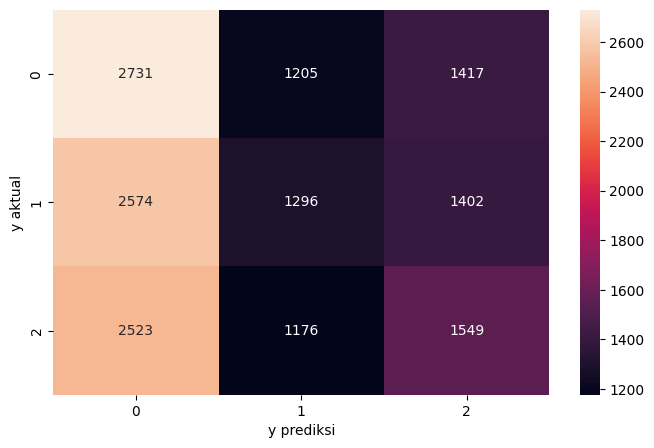

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_train, annot=True, fmt=".0f", ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

sns.heatmap(cm_train, annot=True, fmt=".0f", ax=ax): Membuat heatmap untuk confusion matrix cm_train, dengan menampilkan nilai di setiap sel.
plt.xlabel("y prediksi") dan plt.ylabel("y aktual"): Menambahkan label untuk sumbu X (prediksi) dan Y (aktual).
plt.show(): Menampilkan visualisasi heatmap.

In [ ]:
accuracy_score(y_train, y_pred_train)

0.3512883512883513

accuracy_score(y_train, y_pred_train): Menghitung persentase prediksi yang benar dari total prediksi pada data latih.

y_train: Label aktual data latih.
y_pred_train: Prediksi yang dihasilkan oleh model.

Menghasilkan nilai akurasi antara 0 hingga 1, di mana nilai 1 berarti model sepenuhnya akurat pada data latih.

# Prediksi Data Testing

In [ ]:
y_pred_test = classifier.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 1, 1])

classifier.predict(X_test): Menggunakan model SVM yang telah dilatih untuk memprediksi label pada data uji (X_test).

y_pred_test: Menyimpan hasil prediksi pada data uji.

In [ ]:
cm_test = confusion_matrix(y_test, y_pred_test)
cm_test

array([[641, 323, 353],
       [649, 308, 356],
       [676, 276, 387]])

confusion_matrix(y_test, y_pred_test): Membandingkan label aktual pada data uji (y_test) dengan prediksi model (y_pred_test) untuk menghasilkan confusion matrix.

cm_test: Menyimpan confusion matrix yang menunjukkan jumlah True Positive (TP), False Positive (FP), True Negative (TN), dan False Negative (FN) pada data uji.







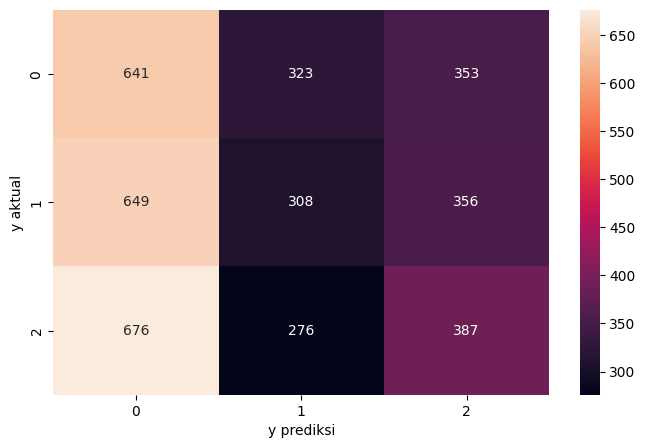

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_test, annot=True, fmt=".0f", ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

sns.heatmap(cm_test, annot=True, fmt=".0f", ax=ax): Membuat heatmap untuk confusion matrix cm_test, dengan nilai setiap sel ditampilkan.
plt.xlabel("y prediksi") dan plt.ylabel("y aktual"): Menambahkan label untuk sumbu X (prediksi) dan Y (aktual).
plt.show(): Menampilkan heatmap untuk evaluasi model pada data uji.